In [1]:
import pandas as pd
import os, config
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
files = os.listdir(config.MidiFiles.preprocessed_csv_files)

In [7]:
dfs = []

for file in files:
    df = pd.read_csv(config.MidiFiles.preprocessed_csv_files + '/' + file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [13]:
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965420 entries, 0 to 7965419
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   delta_time  int64  
 1   event       object 
 2   arg1        int64  
 3   arg2        int64  
 4   arg3        float64
dtypes: float64(1), int64(3), object(1)
memory usage: 303.9+ MB


,delta_time,arg1,arg2,arg3
count,7.965420e+06,7.965420e+06,7.965420e+06,7.933559e+06
mean,2.887944e+01,3.884055e+00,8.488082e+01,4.422920e+01
std,1.585664e+02,4.234400e+00,4.497733e+02,4.734051e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.500000e+01,0.000000e+00
50%,0.000000e+00,2.000000e+00,6.400000e+01,3.400000e+01
75%,1.700000e+01,7.000000e+00,7.300000e+01,8.700000e+01
max,2.345580e+05,1.500000e+01,1.638300e+04,1.270000e+02


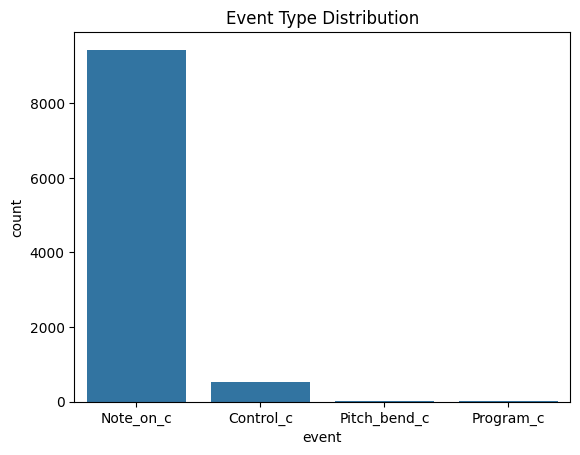

In [18]:
sns.countplot(data=combined_df.sample(10_000), x='event')
plt.title("Event Type Distribution")
plt.show()

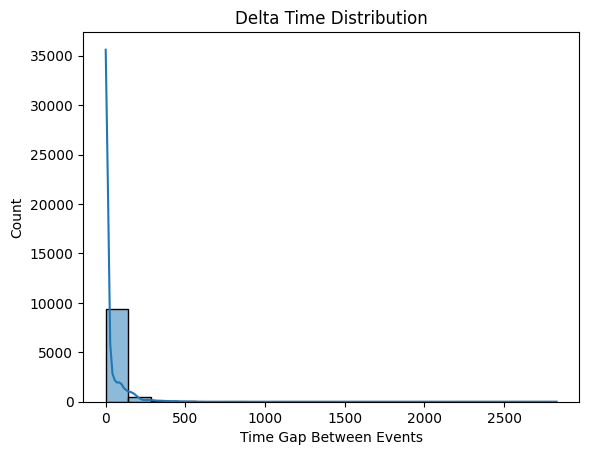

In [20]:
sns.histplot(combined_df['delta_time'].sample(10_000), bins=20, kde=True)
plt.title("Delta Time Distribution")
plt.xlabel("Time Gap Between Events")
plt.show()

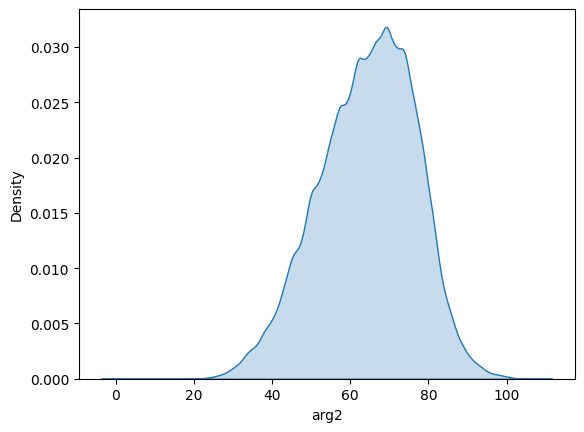

In [28]:
notes = combined_df[combined_df['event'] == 'Note_on_c']['arg2'].sample(100_000)

sns.kdeplot(data=notes, fill=True)
plt.show()